In [1]:
!git clone https://github.com/ChenaoB/Database

Cloning into 'Database'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 52 (delta 4), reused 3 (delta 3), pack-reused 47
Receiving objects: 100% (52/52), 53.18 KiB | 5.91 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [2]:
'''
Packages necesarios
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generación de los datos

In [3]:
"""
Se transfiere la data a pandas
"""
df = pd.read_csv("/content/Database/DataHeavisideNeuronalNetwork.csv")

In [4]:
"""
Se divide el dataset en 75 para entrenamiento y el restante para test
"""
train_set = df.sample(frac = 0.75, random_state=39)
test_set = df.drop(train_set.index)

"""
Tengo 1 entrada: X
Tengo un rango de tags (Problema de regresión)
"""
print(train_set[:5])
print(test_set[:5])

       X    Y
2  -0.92  0.0
23 -0.08  0.0
47  0.88  1.0
16 -0.36  0.0
29  0.16  1.0
       X    Y
0  -1.00  0.0
4  -0.84  0.0
6  -0.76  0.0
9  -0.64  0.0
11 -0.56  0.0


In [5]:
'''
Creación de matrices
'''

# X, Y para entrenamiento
x_train = np.zeros((train_set.shape[0], 1))
y_train = np.zeros((train_set.shape[0], 1))
x_train[:, 0] = train_set['X'].values
y_train[:, 0] = train_set['Y'].values

# X, Y para test
x_test = np.zeros((test_set.shape[0], 1))
y_test = np.zeros((test_set.shape[0], 1))
x_test[:, 0] = test_set['X'].values
y_test[:, 0] = test_set['Y'].values

In [6]:
# Se muestran los primeros 5 datos para verificación

print(f"Matriz de datos de entrenamiento: \n{[[*data] for data in x_train[:5]]}")
print(f"Matriz de etiquetas de entrenamiento: \n{[[*data] for data in y_train[:5]]}", end="\n\n")

print(f"Matriz de datos de test: \n{[[*data] for data in x_test[:5]]}")
print(f"Matriz de etiquetas de test: \n{[[*data] for data in y_test[:5]]}")

Matriz de datos de entrenamiento: 
[[-0.92], [-0.08], [0.88], [-0.36], [0.16]]
Matriz de etiquetas de entrenamiento: 
[[0.0], [0.0], [1.0], [0.0], [1.0]]

Matriz de datos de test: 
[[-1.0], [-0.84], [-0.76], [-0.64], [-0.56]]
Matriz de etiquetas de test: 
[[0.0], [0.0], [0.0], [0.0], [0.0]]


In [7]:
# Biding para la red
X = x_train
Y = y_train

# Implementación de la arquitectura de una red FC

In [8]:
'''
Hiper-parametros
'''
input = X.shape[1]    # Número de entradas
data = X.shape[0]     # Número de datos
output = Y.shape[1]   # Número de salidas
learning_rate = 0.3   # Learning rate
iterations = 3000     # Número de iteraciones
layers = 3            # Número de capas

In [9]:
'''
Analiticas
'''
lost_evolution = []

# Arquitectura de la red

In [10]:
'''
0: Clasificación usando BCE
1: Regresión usando LSE
'''
net_type = 1

In [11]:
'''
Entradas:         2 neuronas
Capa de entrada:  2 neuronas
Capa oculta:      2 neuronas
Capa de salida:   1 neurona
'''
net_architecture = [input, 2, 2, output]

In [12]:
'''
Función de activación para cada capa
'''

'''
2: Función de activación tanh
1: Función de activación sigmoidal
0: Función de activación lineal
'''
net_function = [2, 2, 0]

In [13]:
'''
Inicialización de parametros
'''
bias = []             # Matriz de bias
weight = []           # Matriz de pesos
bias_gradient = []    # Matriz de gradientes de los bias
weight_gradient = []  # Matriz de gradientes de los pesos

In [14]:
for i in range(layers):   # Para recorrer cada capa de la red
  matrix_layer = np.random.rand(net_architecture[i + 1], net_architecture[i])
  weight.append(matrix_layer)

  matrix_gradient = np.zeros([net_architecture[i + 1], net_architecture[i]])
  weight_gradient.append(matrix_gradient)

  bias_matrix = np.random.rand(net_architecture[i + 1], 1)
  bias.append(bias_matrix)

  gradient_vector = np.zeros([net_architecture[i + 1], 1])
  bias_gradient.append(gradient_vector)

bias = np.array(bias, dtype=object)
weight = np.array(weight, dtype=object)
bias_gradient = np.array(bias_gradient, dtype=object)
weight_gradient = np.array(weight_gradient, dtype=object)

print(f"Matriz de bias:\n {bias}")
print(f"Matriz de pesos (weight):\n {weight}")
print(f"Matriz de gradientes de los bias:\n {bias_gradient}")
print(f"Matriz de gradientes de los pesos:\n {weight_gradient}")

Matriz de bias:
 [array([[0.6435244],
        [0.4695684]]) array([[0.46973118],
                             [0.19950013]]) array([[0.60425561]])]
Matriz de pesos (weight):
 [array([[0.8993198 ],
        [0.10140269]]) array([[0.60420213, 0.17656398],
                              [0.50511533, 0.51761738]])
 array([[0.32948806, 0.87495488]])]
Matriz de gradientes de los bias:
 [array([[0.],
        [0.]]) array([[0.],
                      [0.]]) array([[0.]])]
Matriz de gradientes de los pesos:
 [array([[0.],
        [0.]]) array([[0., 0.],
                      [0., 0.]]) array([[0., 0.]])]


# Utilidades generales para la red neuronal

In [15]:
'''
Funciones de utilidad
'''
def get_net_type(net_type):
  if (net_type == 0):
    return "BCE"
  elif (net_type == 1):
    return "LSE"

def matrix_zeros(matrix, num_layer):
  for index in range(num_layer):
    matrix[index] = np.zeros((matrix[index].shape[0], matrix[index].shape[1]))

  return matrix

def extract_data(size, layer):
  X1 = np.zeros((1, size[0]))
  Y1 = np.zeros((1, size[1]))
  X1[0, :] = X[layer, :]
  Y1[0, :] = Y[layer, :]
  return [X1, Y1]

def extract_test(size, layer):
  X1 = np.zeros((1, size[0]))
  Y1 = np.zeros((1, size[1]))
  X1[0, :] = x_test[layer, :]
  Y1[0, :] = y_test[layer, :]
  return [X1, Y1]

def activation_function(zp, act_fun):
  if(act_fun == 0):                       # Función de activación: lineal
    zp_activated = zp
  elif(act_fun == 1):                     # Función de activación: sigmoidal
    zp_activated = 1 / (1 + np.exp(-zp))
  else:                                   # Función de activación: tanh
    zp_activated = np.tanh(zp)
  return zp_activated

def prediction(w_in, bias_in, x_in, nl_in, l_in):
  transpose_matrix = np.vstack((np.transpose(x_in), np.ones((1, 1))))
  activated = []

  for layer in range(l_in):
    params_matrix = np.hstack((w_in[layer], bias_in[layer]))
    # Capa de entrada
    if (layer + 1 == 1):
      # Función de activación y actualización de pesos
      zp = np.dot(params_matrix, transpose_matrix)
    # Capas ocultas o de salida
    else:
      # Vector de la capa anterior
      activation_vector = np.vstack((activated[layer - 1], np.ones((1, 1))))
      # Función de activación y actualización de pesos
      zp = np.dot(params_matrix, activation_vector)

    activated.append(activation_function(zp, nl_in[layer]))

  return activated

# Función de activación en la capa de salida
def delta_output(nl_delta, y_delta, output_delta):
  lost = 0
  if (net_type == 0):
    if(y_delta[0, 0]):
      lost = -1 / output_delta
    elif (net_type == 1):
      lost = 1 / (1 - output_delta)
  else:
      lost = output_delta - y_delta

  if(nl_delta == 0):                                      # Lineal
    delta = lost
  elif(nl_delta == 1):                                    # Sigmoidal
    delta = lost * (output_delta * (1 - output_delta))
  elif (nl_delta == 2):                                   # Tangente hiperbolico
    delta = lost * (1 - output_delta ** 2)

  return delta

# Función de activación para capas intermedias
def delta_layer(prev_delta, w_delta, zl_delta, nl_delta):
  delta_transpose = np.dot(np.transpose(w_delta), prev_delta)

  if(nl_delta == 0):
    # Lineal
    delta = delta_transpose
  elif(nl_delta == 1):
    # Sigmoidal
    delta = delta_transpose * (zl_delta * (1 - zl_delta))
  elif (nl_delta == 2):
    # Tangente hiperbolico
    delta = delta_transpose * (1 - zl_delta ** 2)

  return delta

def calculate_rmse(actual, predicted):
    # Ensure actual and predicted values are numpy arrays
    actual = np.array(actual)
    predicted = np.array(predicted)

    # Calculate the squared differences
    squared_diff = (actual - predicted) ** 2

    # Calculate the mean squared error
    mean_squared_error = np.mean(squared_diff)

    # Calculate the root mean squared error
    rmse = np.sqrt(mean_squared_error)

    return rmse

# Desarrolle una función que permita propagar cada dato (Backpropagation)

In [16]:
for i in range(iterations):
  for j in range(data):
    X1, Y1 = extract_data([input, output], j)
    current_prediction = prediction(weight, bias, X1, net_function, layers)
    error_track = []

    '''
    Backpropagation
    '''
    for h in range(layers - 1, -1, -1):
      # Capa de salida
      if (h + 1 == layers):
        error = delta_output(net_function[h], Y1, current_prediction[h])
      # Las demás capas
      else:
        error = delta_layer(error, weight[h + 1], current_prediction[h], net_function[h])
      error_track.append(error)
    error_track.reverse()
    error_track = np.array(error_track, dtype=object)

    # Gradientes de los bias y los pesos
    for t in range(layers):
      bias_gradient[t] = bias_gradient[t] + error_track[t]
      # Capa de entrada
      if(t == 0):
        weight_gradient[t] = weight_gradient[t] + X1 * error_track[t]
      # Capa de salida y capas ocultas
      else:
        weight_gradient[t] = weight_gradient[t] + np.transpose(current_prediction[t - 1]) * error_track[t]

  '''
  Actualización
  '''
  for k in range(layers):
    bias[k] = bias[k] - (learning_rate / data) * (bias_gradient[k])
    weight[k] = weight[k] - (learning_rate / data) * weight_gradient[k]
  prediction_vector = []

  '''
  Función de perdida
  '''
  for a in range(data):
    evolution = 0
    X1, Y1 = extract_data([input, output], a)
    prediction_vector = prediction(weight, bias, X1, net_function, layers)

    if (net_type == 0):
      # Implementación de la fusión de perdida (BCE)
      if(Y1[0, 0]):
        evolution -= np.log(prediction_vector[layers - 1])
      else:
        evolution -= np.log(1 - prediction_vector[layers - 1])
    elif (net_type == 1):
      # Implementación de la fusión de perdida (LSE)
      evolution += (prediction_vector[layers - 1] - Y1[0, 0]) ** 2

  lost_evolution.append(evolution)

  '''
  Reincio del bucle - Limpieza de matrices
  '''
  weight_gradient = matrix_zeros(weight_gradient, layers)
  bias_gradient = matrix_zeros(bias_gradient, layers)

# Analiticas del rendimiento

In [17]:
'''
Calculating and displaying RMSE
'''
# Use the trained model to make predictions on the test set
predictions_test = [prediction(weight, bias, extract_test([input, output], i)[0], net_function, layers)[layers - 1][0][0] for i in range(len(test_set))]
predictions_test = np.array(predictions_test)

# Calculate RMSE
rmse = calculate_rmse(y_test, predictions_test)
print(f"Root Mean Square Error (RMSE) on the test set: {rmse}")

Root Mean Square Error (RMSE) on the test set: 0.7055312924827559


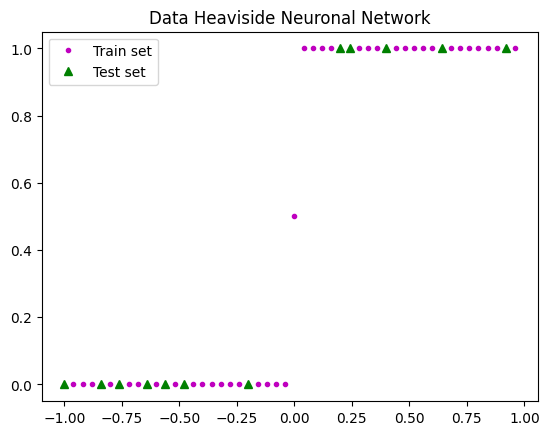

In [18]:
"""
Grafico del set de entrenamiento y test
"""

plt.plot(train_set["X"], train_set["Y"], '.m', label = 'Train set')
plt.plot(test_set["X"], test_set["Y"], "^g", label = "Test set")
plt.title("Raw dataset")
plt.legend()
plt.show()

In [19]:
'''
Analiticas de rendimiento
'''
epochs = np.arange(1, iterations + 1, 1)
loss = np.concatenate(lost_evolution)

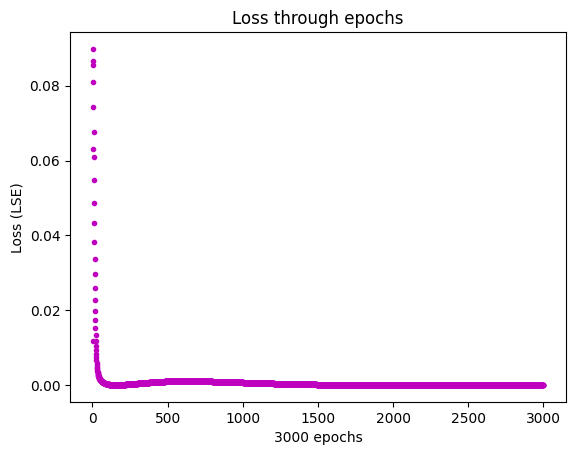

In [20]:
'''
Graficas sobre el rendimiento
'''

plt.plot(epochs, loss, '.m')
plt.ylabel(f"Loss ({get_net_type(net_type)})")
plt.xlabel(f"{iterations} epochs")
plt.title("Loss through epochs")
plt.show()

In [21]:
'''
Comprobación de los datos de train
'''
prediction_track = []

print("X1 \tY1 \tY_p")
for a in range(data):
  X1, Y1 = extract_data([input, output], a)
  current_prediction = prediction(weight, bias, X1, net_function, layers)
  prediction_track.append(current_prediction[layers - 1])
  print(f"{X1[0][0]} \t{Y1[0][0]} \t{np.round(current_prediction[layers - 1][0][0], 4)}")

X1 	Y1 	Y_p
-0.92 	0.0 	0.0171
-0.08 	0.0 	0.0274
0.88 	1.0 	0.9848
-0.36 	0.0 	-0.0126
0.16 	1.0 	1.0862
-0.96 	0.0 	0.0164
-0.88 	0.0 	0.0177
0.36 	1.0 	1.0193
-0.12 	0.0 	-0.0546
-0.24 	0.0 	-0.0546
0.12 	1.0 	1.0656
-0.4 	0.0 	-0.0034
0.72 	1.0 	0.9854
-0.28 	0.0 	-0.0386
-0.72 	0.0 	0.019
0.96 	1.0 	0.9851
-0.6 	0.0 	0.017
0.32 	1.0 	1.0312
0.6 	1.0 	0.9885
0.04 	1.0 	0.7884
-0.16 	0.0 	-0.0755
-0.68 	0.0 	0.0188
0.44 	1.0 	1.0029
-0.8 	0.0 	0.0187
0.76 	1.0 	0.985
0.48 	1.0 	0.9975
0.08 	1.0 	0.9807
0.28 	1.0 	1.0459
0.68 	1.0 	0.986
-0.44 	0.0 	0.0036
0.84 	1.0 	0.9847
0.0 	0.5 	0.4979
0.8 	1.0 	0.9848
-0.32 	0.0 	-0.0243
0.52 	1.0 	0.9936
-0.04 	0.0 	0.2123
-0.52 	0.0 	0.0126
0.56 	1.0 	0.9906


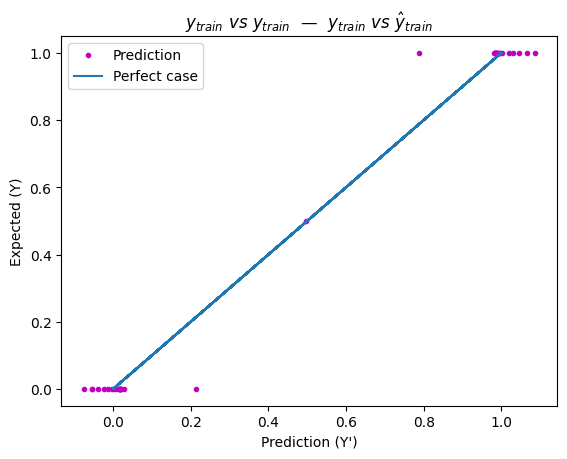

In [22]:
plt.plot(np.concatenate(prediction_track), y_train, '.m', label = 'Prediction')
plt.plot(y_train, y_train, label = 'Perfect case')
plt.xlabel("Prediction (Y')")
plt.ylabel('Expected (Y)')
plt.title(r'$y_{train} \ vs \ y_{train} \ \ — \ \ y_{train} \ vs \ \hat{y}_{train}}$')
plt.legend()
plt.show()

X train 	 Prediction
-0.92 		0.017080269436961282
-0.08 		0.027351538837501077
0.88 		0.984775484982352
-0.36 		-0.01257456583853156
0.16 		1.086174495183048
-0.96 		0.016368534772882692
-0.88 		0.017725780882553055
0.36 		1.0193357077862417
-0.12 		-0.05459862345373567
-0.24 		-0.05462218511718231
0.12 		1.0656457590442034
-0.4 		-0.003399630752150551
0.72 		0.9853619069968127
-0.28 		-0.038555228251834106
-0.72 		0.019024216629138002
0.96 		0.9851175364959812
-0.6 		0.017012275218869166
0.32 		1.031246111875591
0.6 		0.9885350751953772
0.04 		0.7883860406556598
-0.16 		-0.07554186182954759
-0.68 		0.01877866725777322
0.44 		1.002905956996952
-0.8 		0.018711834840511643
0.76 		0.9849633581070788
0.48 		0.9975461117474828
0.08 		0.9806766472814916
0.28 		1.045921063456205
0.68 		0.9860270739498769
-0.44 		0.003587691928008785
0.84 		0.9847148749425264
0.0 		0.4979331015686582
0.8 		0.9847646231346743
-0.32 		-0.024275803299477317
0.52 		0.9935630432673616
-0.04 		0.2122629898515459
-0.

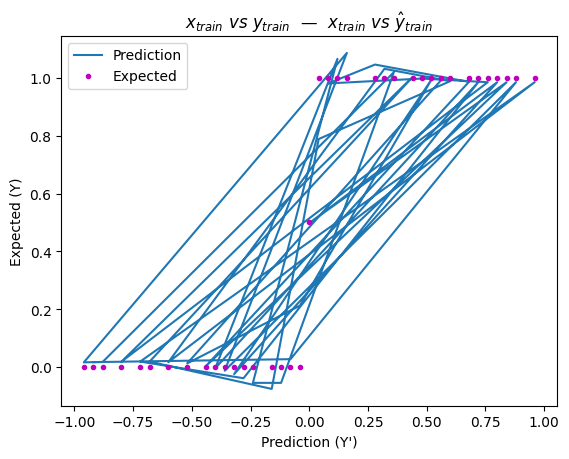

In [23]:
print("X train \t Prediction")
for i in range(x_train.shape[0]):
  print(f"{x_train[i][0]} \t\t{np.concatenate(prediction_track)[i][0]}")

plt.plot(x_train, np.concatenate(prediction_track), label = 'Prediction')
plt.plot(x_train, y_train, '.m', label = 'Expected')
plt.xlabel("Prediction (Y')")
plt.ylabel('Expected (Y)')
plt.title(r'$x_{train} \ vs \ y_{train} \ \ — \ \ x_{train} \ vs \ \hat{y}_{train}}$')
plt.legend()
plt.show()

In [24]:
'''
Comprobación de los datos de test
'''
test_data = x_test.shape[0]
prediction_track = []

print(f"X1 \tY1 \tY_p")
for j in range(test_data):
  X1, Y1 = extract_test([input, output], j)
  current_prediction = prediction(weight, bias, X1, net_function, layers)
  prediction_track.append(current_prediction[layers - 1])
  print(f"{X1[0][0]} \t{Y1[0][0]} \t{np.round(current_prediction[layers - 1][0][0], 4)}")

X1 	Y1 	Y_p
-1.0 	0.0 	0.0156
-0.84 	0.0 	0.0183
-0.76 	0.0 	0.019
-0.64 	0.0 	0.0181
-0.56 	0.0 	0.0152
-0.48 	0.0 	0.0088
-0.2 	0.0 	-0.0696
0.2 	1.0 	1.0788
0.24 	1.0 	1.0627
0.4 	1.0 	1.01
0.64 	1.0 	0.987
0.92 	1.0 	0.9849


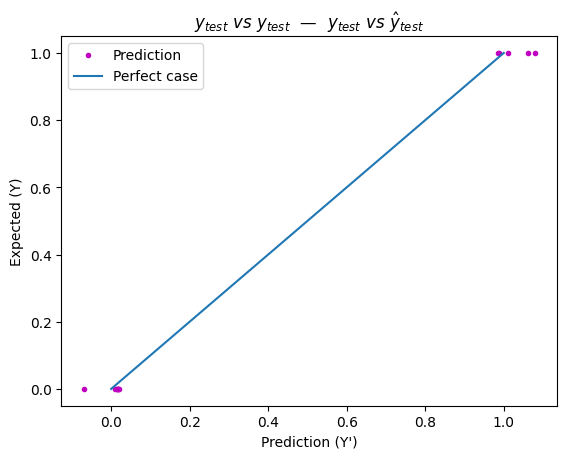

In [25]:
plt.plot(np.concatenate(prediction_track), y_test, '.m', label = 'Prediction')
plt.plot(y_test, y_test, label = 'Perfect case')
plt.xlabel("Prediction (Y')")
plt.ylabel('Expected (Y)')
plt.title(r'$y_{test} \ vs \ y_{test} \ \ — \ \ y_{test} \ vs \ \hat{y}_{test}}$')
plt.legend()
plt.show()

X train 	 Prediction
-1.0 		0.015609505536349544
-0.84 		0.018280378233486938
-0.76 		0.018978081100858524
-0.64 		0.018148294174311963
-0.56 		0.015214670973556665
-0.48 		0.00878382674774214
-0.2 		-0.06956015628719892
0.2 		1.0788206463303032
0.24 		1.0627179365823465
0.4 		1.0100249553146654
0.64 		0.9870465304355119
0.92 		0.9849171225774462


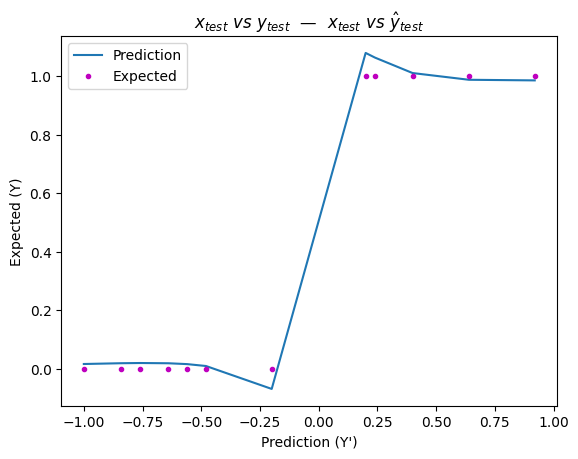

In [26]:
print("X train \t Prediction")
for i in range(x_test.shape[0]):
  print(f"{x_test[i][0]} \t\t{np.concatenate(prediction_track)[i][0]}")

plt.plot(x_test, np.concatenate(prediction_track), label = 'Prediction')
plt.plot(x_test, y_test, '.m', label = 'Expected')
plt.xlabel("Prediction (Y')")
plt.ylabel('Expected (Y)')
plt.title(r'$x_{test} \ vs \ y_{test} \ \ — \ \ x_{test} \ vs \ \hat{y}_{test}}$')
plt.legend()
plt.show()